In [1]:
import numpy as np
from sklearn.datasets import make_regression

In [2]:
x, y = make_regression(n_samples=1000, n_features=10, noise=15, random_state=42)

In [3]:
x

array([[ 1.57587581,  0.89186302, -0.72677414, ...,  0.99455824,
        -0.29969606, -0.76176037],
       [ 0.53545875,  1.26666125, -1.77987511, ..., -0.55527309,
         0.74131982, -0.98752296],
       [-0.68627914,  0.15712792,  0.14583647, ...,  0.19791667,
        -0.40436199, -0.60747229],
       ...,
       [ 0.42796263, -0.83359828,  1.63925652, ...,  0.19188955,
        -0.5552861 , -0.16055961],
       [-0.27372925, -1.38059871,  0.14959796, ..., -0.06963345,
        -0.68363428,  0.68916446],
       [ 0.5376299 ,  0.37915312, -0.2799933 , ..., -2.39030437,
         0.91347373, -0.41222075]], shape=(1000, 10))

In [4]:
y

array([-5.71454677e+01,  8.91218164e+01, -1.04015494e+02,  5.57087714e+01,
        1.51783618e+02, -2.84431155e+01, -9.53176757e+01,  2.26601661e+02,
        6.10468702e+01, -4.34093454e+01,  7.01644469e+01,  1.81659308e+01,
       -1.18543950e+01,  1.08379096e+02,  2.96149303e+01, -2.31411289e+02,
        1.59659069e+02,  1.66125310e+02, -2.56636777e+01,  5.51949035e+01,
        2.78427298e+01, -1.15033312e+02, -4.36828398e+01, -3.29850365e+01,
        1.57590540e+02,  1.46999853e+02, -1.41315408e+02, -1.06356972e+02,
       -4.35885637e+01, -2.04544230e+01, -9.53068134e+01, -1.52563590e+02,
        8.55485472e+01, -1.07150802e+02,  2.49931413e+01,  1.04090379e+02,
       -1.75471876e+02, -5.48727104e+01,  1.28509487e+02, -1.53521085e+01,
        3.54366099e+01,  1.21835254e+02, -2.11723606e+02,  1.61344290e+02,
        1.81301850e+02, -2.61943891e+02,  1.83807728e+02,  7.58264703e+01,
        6.48540844e+01,  1.94069446e+02,  2.89562450e+02, -2.50147147e+02,
        1.08541229e+02, -

In [5]:
from sklearn.linear_model import Ridge, Lasso, LinearRegression, ElasticNet

In [7]:
models = {
    'linear regression' : LinearRegression(),
    'Lasso' : Lasso(alpha=1.0),
    'Ridge' : Ridge(alpha=0.1),
    'Elastic' : ElasticNet()
}
from sklearn.metrics import mean_squared_error

In [9]:
result = {}

for name, model in models.items():
    model.fit(x, y)
    y_pred = model.predict(x)

    result[name] = {
        'name' : name,
        'mse' : mean_squared_error(y, y_pred),
        'coef' : model.coef_
    }

In [10]:
result

{'linear regression': {'name': 'linear regression',
  'mse': 208.96938048151003,
  'coef': array([33.4604021 , 31.70191931, 29.16967227, 74.2141149 ,  6.99355055,
          9.51298316, 76.12703179,  9.4731884 ,  4.65054142, 58.8864631 ])},
 'Lasso': {'name': 'Lasso',
  'mse': 219.18891965710344,
  'coef': array([32.30149642, 30.62233629, 28.2408078 , 73.2227372 ,  5.99394242,
          8.60041083, 74.97226335,  8.49805377,  3.59687288, 57.92137601])},
 'Ridge': {'name': 'Ridge',
  'mse': 208.96957016650993,
  'coef': array([33.45635492, 31.69805027, 29.16680431, 74.20689507,  6.99300605,
          9.51253074, 76.1182288 ,  9.47261696,  4.64973789, 58.88082346])},
 'Elastic': {'name': 'Elastic',
  'mse': 2310.318495021751,
  'coef': array([20.39790124, 19.28829023, 19.29678592, 49.65866299,  4.61306625,
          7.14816213, 47.89890826,  6.78069764,  2.03018107, 39.49952479])}}

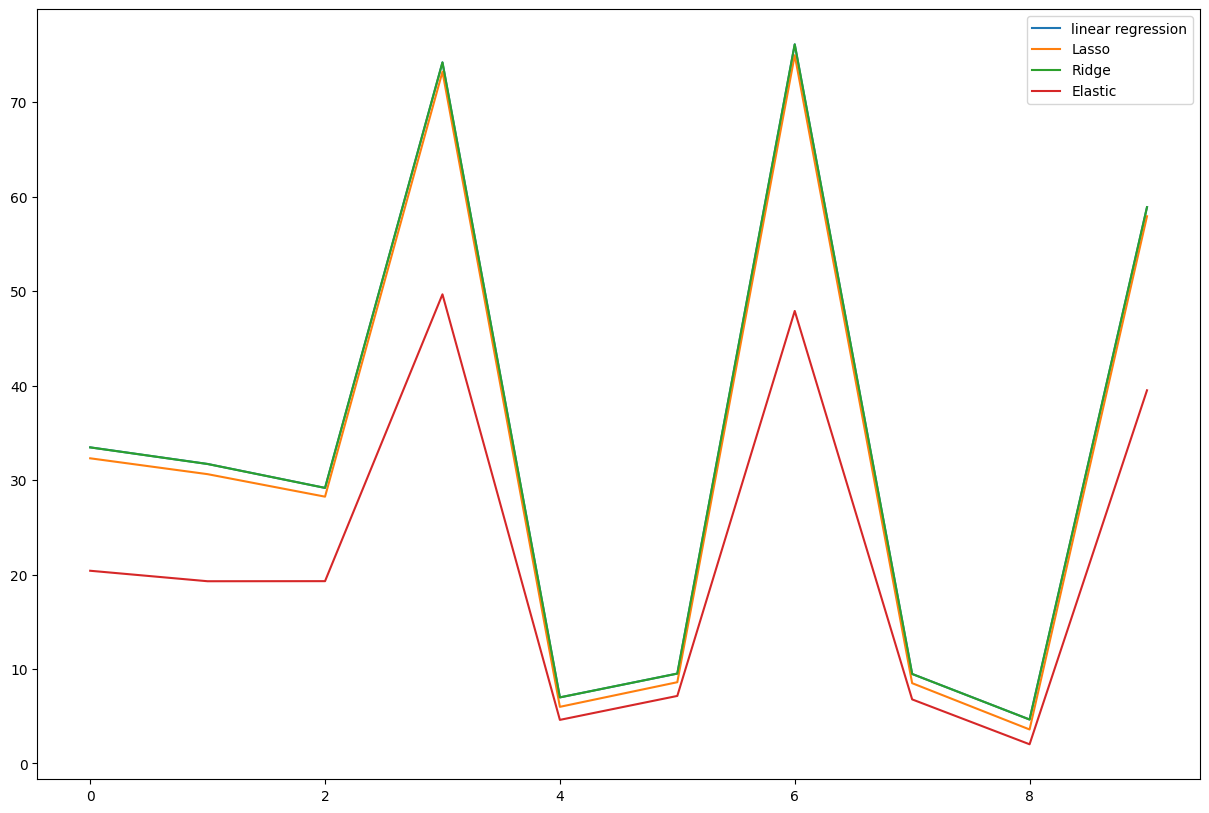

In [20]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 10))
for name, res in result.items():
    plt.plot(res['coef'], label=name)


plt.legend()